In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/presentacion/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/presentacion/TRAIN_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [3]:
#train["CLASS"].unique()

In [4]:
#train["relaciones"]=train["relaciones"]+train["antonimos"]

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

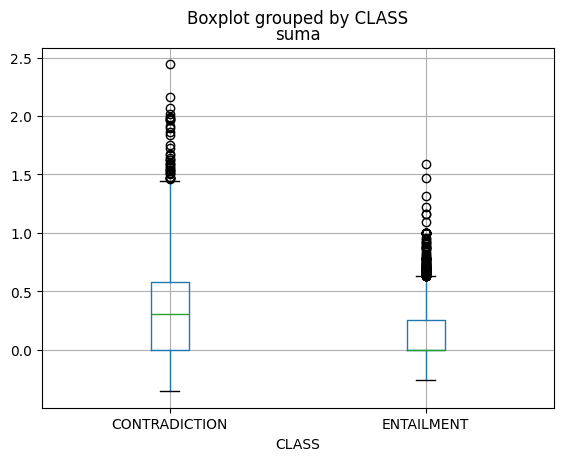

In [5]:
train.boxplot(by="CLASS",column=["suma"])

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

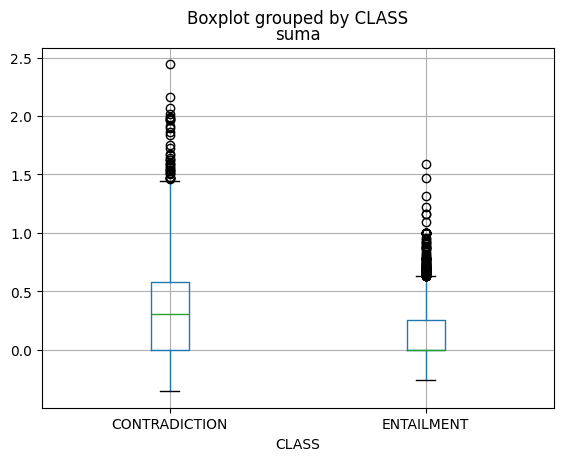

In [6]:
train.boxplot(by="CLASS",column=["suma"])

In [7]:
# train["bandera"]=-1
# temp=train.copy()
# for index, strings  in temp.iterrows():
#     if strings["m_earth"]==0.0:
#         train.at[index,"bandera"]=1

In [8]:
train=train.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,1.000,0.685520,0.332179,0.710647,0,CONTRADICTION
1,2.197,2.104376,1.626334,1.220333,2,CONTRADICTION
2,1.585,0.682195,0.231839,0.710647,0,ENTAILMENT
3,2.171,3.503575,2.801286,0.976367,0,CONTRADICTION
4,2.581,4.141778,3.274561,2.641717,1,CONTRADICTION
...,...,...,...,...,...,...
34,1.685,3.526506,2.440007,0.678063,0,CONTRADICTION
35,1.530,2.093066,1.058870,0.677722,0,CONTRADICTION
36,2.209,4.867770,3.191463,2.083873,1,CONTRADICTION
37,2.156,1.432420,1.186878,0.802427,0,CONTRADICTION


In [9]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [10]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [11]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

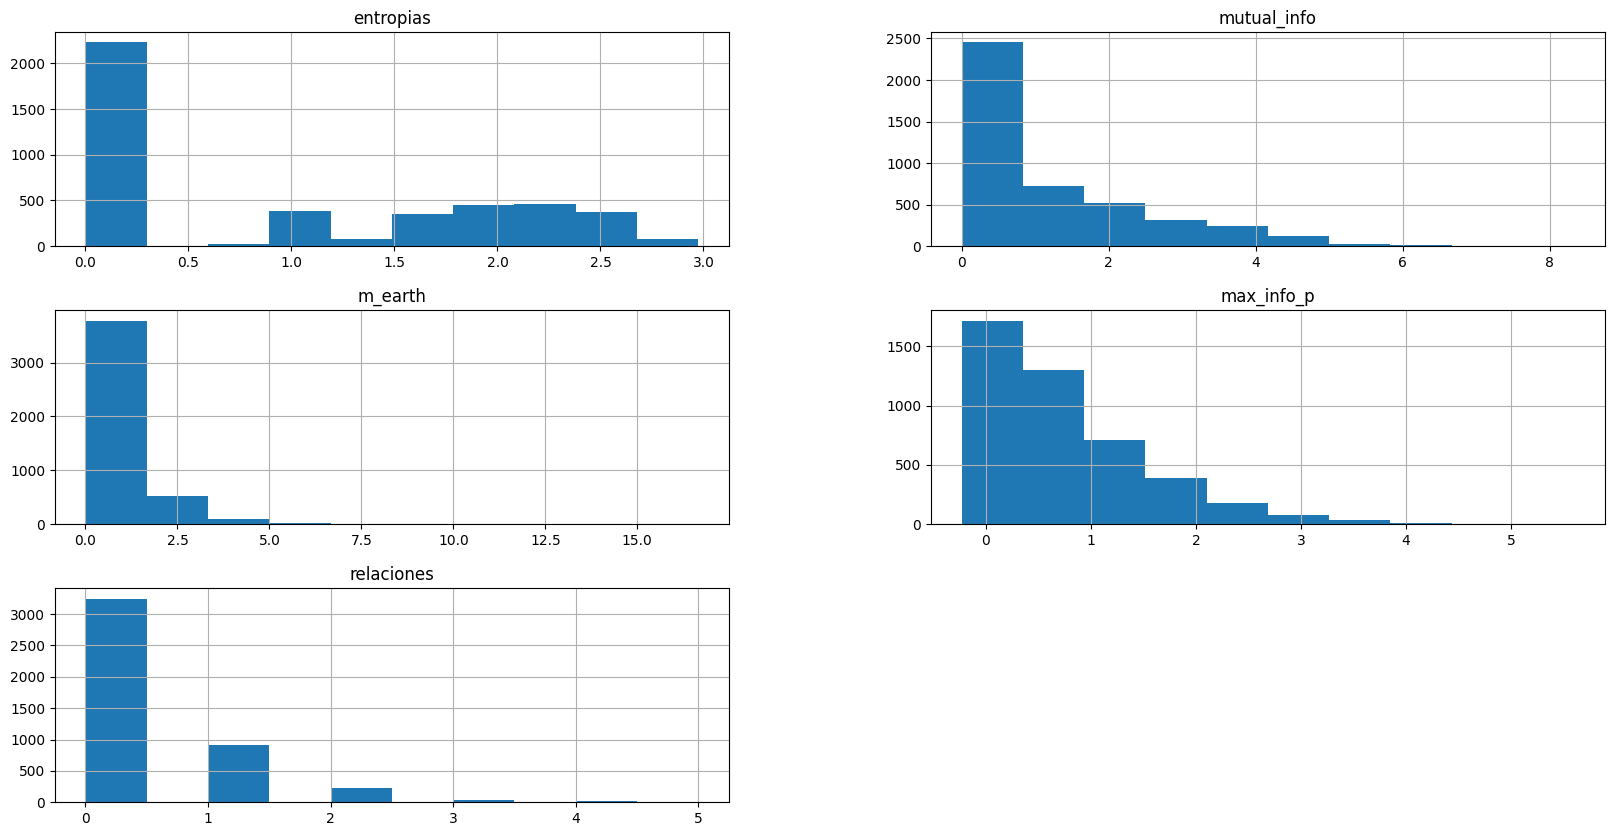

In [12]:
train.hist(figsize=(20,10))
plt.show()

# DEV

In [13]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/presentacion/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/presentacion/DEV_'+str(i+1)+'.csv.csv')
        dev=pd.concat([dev,temp])

In [14]:
#dev["relaciones"]=dev["relaciones"]+dev["antonimos"]

In [15]:
# dev["bandera"]=-1
# temp=dev.copy()
# for index, strings  in temp.iterrows():
#     if strings["m_earth"]==0.0:
#         dev.at[index,"bandera"]=1

In [16]:
dev=dev.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
dev

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,0.000,1.368566,0.912076,0.557043,0,CONTRADICTION
1,2.338,3.471361,1.687463,2.614866,1,CONTRADICTION
2,1.000,1.420585,0.534727,0.604197,0,CONTRADICTION
3,2.390,3.528014,2.892120,2.360747,1,CONTRADICTION
4,0.000,0.000000,0.000000,0.000000,0,CONTRADICTION
...,...,...,...,...,...,...
90,1.784,2.059726,1.580747,1.163645,1,CONTRADICTION
91,1.000,0.670035,0.282470,0.404658,0,CONTRADICTION
92,2.459,2.791256,1.364256,0.791051,0,CONTRADICTION
93,2.352,2.763037,2.291368,1.437532,1,CONTRADICTION


In [17]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [18]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    else:
        y_dev.append(0)

In [19]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [20]:
for i in range(50):
    if i==0:
        test = pd.read_csv('salida/resultados/SICK/presentacion/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/presentacion/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [21]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [22]:
# test["bandera"]=-1
# temp=test.copy()
# for index, strings  in temp.iterrows():
#     if strings["m_earth"]==0.0:
#         test.at[index,"bandera"]=1

In [23]:
test=test.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.514,4.140434,3.473197,2.260727,0,CONTRADICTION
1,2.524,2.774364,2.741071,1.473877,0,CONTRADICTION
2,2.453,3.496069,2.353635,2.456701,1,CONTRADICTION
3,0.000,0.000000,0.000000,0.000000,0,ENTAILMENT
4,0.000,0.669430,0.262647,0.473630,0,CONTRADICTION
...,...,...,...,...,...,...
1,2.671,2.781929,1.478042,1.756696,1,CONTRADICTION
2,2.041,2.765430,3.072888,1.246748,1,CONTRADICTION
3,2.189,2.792837,2.510770,0.930635,1,CONTRADICTION
4,2.383,5.572761,4.585931,3.162525,2,CONTRADICTION


In [24]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [25]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [26]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [27]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [28]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
model.decision_function(X)

array([-0.90441041, -1.94130745, -0.93459896, ..., -6.21230634,
       -2.00373931, -3.84470427])

In [30]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones'], dtype='object')

In [31]:
model.classes_

array([0, 1])

In [32]:
model.coef_[0]

array([-0.06396898, -1.80343403, -0.02499735, -0.02347992,  0.32722243])

In [33]:
coeficientes=model.coef_[0]

In [34]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  4 relaciones 1 mutual_info


In [35]:
n_columns=train.shape[1]-1

In [36]:
n_columns

5

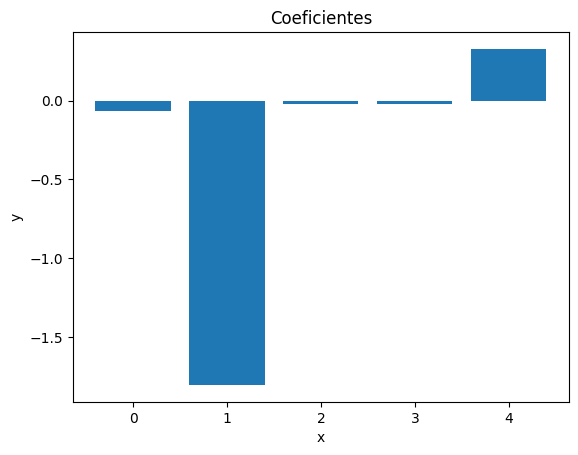

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [38]:
predictions = model.predict(X_dev)

In [39]:
print(confusion_matrix(y_dev, predictions))

[[275  77]
 [ 53  90]]


In [40]:
print(confusion_matrix(y_dev, predictions))

[[275  77]
 [ 53  90]]


In [41]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.74
precision:  0.54
recall 0.63
f1_score:  0.58


In [42]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.74
precision:  0.54
recall 0.63
f1_score:  0.58


In [43]:
predictions = model.predict(X_test)

In [44]:
print(confusion_matrix(y_test, predictions))

[[2733  769]
 [ 498  906]]


In [45]:
print(confusion_matrix(y_test, predictions))

[[2733  769]
 [ 498  906]]


In [46]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.74
precision:  0.54
recall 0.65
f1_score:  0.59
matthews_score:  0.41


In [47]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.74
precision:  0.54
recall 0.65
f1_score:  0.59
matthews_score:  0.41


In [48]:
X_train.shape

(4439, 5)

In [49]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [50]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [51]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.740000 (0.021519)


In [52]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.540000 (0.033358)
Logistic Regression: 0.640000 (0.042971)
Logistic Regression: 0.580000 (0.027167)


In [53]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.400000 (0.040173)


# SHAP

In [54]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [55]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [56]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [57]:
explainer.expected_value

-1.3556868473155492

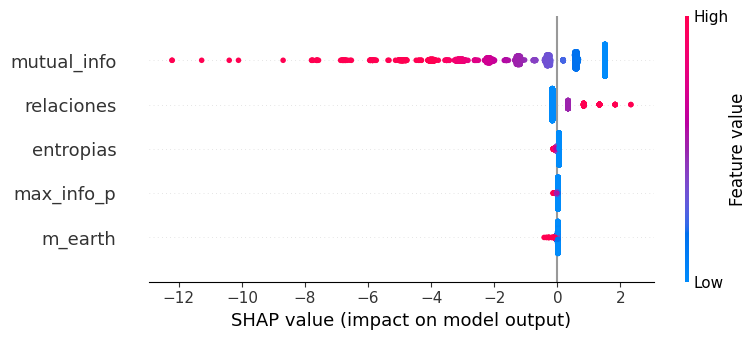

In [58]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])